In [1]:
import numpy as np
import pandas as pd
import os
import requests
from datetime import datetime
import pytz
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [3]:
# read in the data file we are working with 

df = pd.read_csv("/Users/laurafedoruk/ds/metis/projects/03-mcnulty/WDIData.csv")


In [4]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.600,77.443,78.245,79.019,79.793,80.571,81.349,82.112,82.832,83.475,84.006,84.416,84.735,85.004,85.245,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.149,76.564,74.067,74.846,75.304,76.042,76.769,77.147,77.986,78.553,79.236,79.768,80.230,80.968,82.629,83.352,83.788,84.392,85.042,84.655,85.955,86.392,86.847,87.605,88.039,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.358,60.178,61.295,62.107,62.967,63.730,64.701,64.953,66.388,64.089,65.189,65.527,66.221,67.481,67.517,70.092,70.265,71.238,72.292,71.765,73.734,74.501,75.218,76.712,77.407,NaN,NaN,NaN


In [5]:
#cnx = create_engine('postgresql://ubuntu:@XXXXXX/worldbankdata')

In [5]:
df_by_yr = pd.read_csv("/Users/laurafedoruk/ds/metis/projects/03-mcnulty/wdidata_year_export.csv")

In [6]:
df_by_yr.head()

,country_code,country_name,indicator_code,indicator_name,year,val
0,ARB,Arab World,SE.PRM.PRSL.FE.ZS,"Persistence to last grade of primary, female (...",1960,NaN
1,ARB,Arab World,SE.PRM.PRSL.FE.ZS,"Persistence to last grade of primary, female (...",1961,NaN
2,ARB,Arab World,SE.PRM.PRSL.FE.ZS,"Persistence to last grade of primary, female (...",1962,NaN
3,ARB,Arab World,SE.PRM.PRSL.FE.ZS,"Persistence to last grade of primary, female (...",1963,NaN
4,ARB,Arab World,SE.PRM.PRSL.FE.ZS,"Persistence to last grade of primary, female (...",1964,NaN


In [7]:
df_no_indicator_name = df_by_yr.drop('indicator_name', 1)
df_no_indicator_name.head()

,country_code,country_name,indicator_code,year,val
0,ARB,Arab World,SE.PRM.PRSL.FE.ZS,1960,NaN
1,ARB,Arab World,SE.PRM.PRSL.FE.ZS,1961,NaN
2,ARB,Arab World,SE.PRM.PRSL.FE.ZS,1962,NaN
3,ARB,Arab World,SE.PRM.PRSL.FE.ZS,1963,NaN
4,ARB,Arab World,SE.PRM.PRSL.FE.ZS,1964,NaN


In [8]:
df_yr_T = df_no_indicator_name.pivot_table(values = 'val', index = ['country_code', 'country_name','year'], columns = 'indicator_code' )

In [9]:
df_yr_T.head()

indicator_code                  AG.AGR.TRAC.NO  AG.CON.FERT.PT.ZS  \
country_code country_name year                                      
ABW          Aruba        1960             NaN                NaN   
                          1961             NaN                NaN   
                          1962             NaN                NaN   
                          1963             NaN                NaN   
                          1964             NaN                NaN   

indicator_code                  AG.CON.FERT.ZS  AG.LND.AGRI.K2  \
country_code country_name year                                   
ABW          Aruba        1960             NaN             NaN   
                          1961             NaN            20.0   
                          1962             NaN            20.0   
                          1963             NaN            20.0   
                          1964             NaN            20.0   

indicator_code                  AG.LND.AGRI.ZS  AG.LND.ARBL.HA  \
country_code country_name year                                   
ABW          Aruba        1960             NaN             NaN   
                          1961          11.111          2000.0   
                          1962          11.111          2000.0   
                          1963          11.111          2000.0   
                          1964          11.111          2000.0   

indicator_code                  AG.LND.ARBL.HA.PC  AG.LND.ARBL.ZS  \
country_code country_name year                                      
ABW          Aruba        1960                NaN             NaN   
                          1961              0.036          11.111   
                          1962              0.036          11.111   
                          1963              0.035          11.111   
                          1964              0.035          11.111   

indicator_code                  AG.LND.CREL.HA  AG.LND.CROP.ZS  \
country_code country_name year                                   
ABW          Aruba        1960             NaN             NaN   
                          1961             NaN             NaN   
                          1962             NaN             NaN   
                          1963             NaN             NaN   
                          1964             NaN             NaN   

indicator_code                  AG.LND.EL5M.RU.K2  AG.LND.EL5M.RU.ZS  \
country_code country_name year                                         
ABW          Aruba        1960                NaN                NaN   
                          1961                NaN                NaN   
                          1962                NaN                NaN   
                          1963                NaN                NaN   
                          1964                NaN                NaN   

indicator_code                  AG.LND.EL5M.UR.K2  AG.LND.EL5M.UR.ZS  \
country_code country_name year                                         
ABW          Aruba        1960                NaN                NaN   
                          1961                NaN                NaN   
                          1962                NaN                NaN   
                          1963                NaN                NaN   
                          1964                NaN                NaN   

indicator_code                  AG.LND.EL5M.ZS  AG.LND.FRST.K2  \
country_code country_name year                                   
ABW          Aruba        1960             NaN             NaN   
                          1961             NaN             NaN   
                          1962             NaN             NaN   
                          1963             NaN             NaN   
                          1964             NaN             NaN   

indicator_code                  AG.LND.FRST.ZS  AG.LND.IRIG.AG.ZS  \
country_code country_name year                                      
ABW          Aruba        1960  

In [10]:
df_yr_T.count().sort_values(ascending = False).nlargest(30)

indicator_code
SP.POP.TOTL          14623
SP.POP.GROW          14571
SP.URB.TOTL.IN.ZS    14552
SP.RUR.TOTL.ZS       14552
SP.URB.TOTL          14511
SP.RUR.TOTL          14511
SP.URB.GROW          14461
AG.SRF.TOTL.K2       14185
AG.LND.TOTL.K2       14180
EN.POP.DNST          14078
SP.RUR.TOTL.ZG       14066
SP.DYN.CBRT.IN       13736
                     ...  
SP.DYN.TO65.FE.ZS    13440
SP.DYN.TO65.MA.ZS    13440
SP.POP.5559.FE.5Y    13376
SP.POP.6064.MA.5Y    13376
SP.POP.6064.FE.5Y    13376
SP.POP.5559.MA.5Y    13376
SP.POP.5054.FE.5Y    13376
SP.POP.5054.MA.5Y    13376
SP.POP.6569.MA.5Y    13376
SP.POP.4549.MA.5Y    13376
SP.POP.4549.FE.5Y    13376
SP.POP.6569.FE.5Y    13376
Length: 30, dtype: int64

In [11]:
def economy_classifier(growth_rate):
    economy_class = 'nan'
    if growth_rate < 0:
        economy_class = 0
    if growth_rate >= 0:
        economy_class = 1
    return economy_class    
        
    

In [12]:
df_yr_T['growing_1_shrinking_0'] = df_yr_T['NY.ADJ.NNTY.KD.ZG'].apply(economy_classifier)


In [13]:
df_yr_T['growing_1_shrinking_0'].value_counts()

nan    9013
1      4601
0      1170
Name: growing_1_shrinking_0, dtype: int64

In [14]:
 mask = df_yr_T['growing_1_shrinking_0'] != 'nan'

In [15]:
df_full_target_economy = df_yr_T[mask]

In [16]:
df_full_target_economy['growing_1_shrinking_0'].value_counts()

1    4601
0    1170
Name: growing_1_shrinking_0, dtype: int64

In [17]:

Full_X_y_df = df_full_target_economy.loc[:,['SP.POP.GROW','SP.URB.GROW', 'growing_1_shrinking_0']].dropna()
X = Full_X_y_df.loc[:,['SP.POP.GROW', 'SP.URB.GROW']]
y = Full_X_y_df['growing_1_shrinking_0']

In [18]:
y.describe()

count     5769
unique       2
top          1
freq      4600
Name: growing_1_shrinking_0, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .3)


In [20]:
np.mean(y_train)


0.7956909361069836

/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


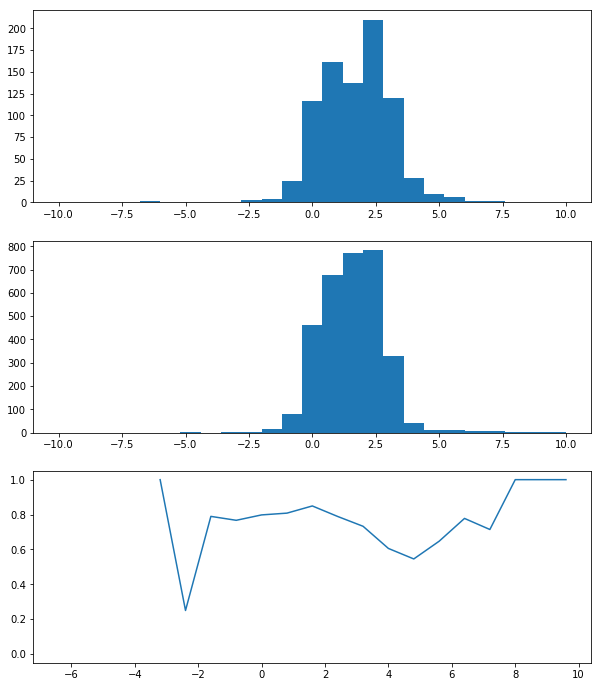

In [21]:
## Make histogram
#Let's visualize - is there a difference in how we predict when the true answer is 1 versus 0?
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 2 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'SP.POP.GROW'], bins=25, range=(-10,10))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'SP.POP.GROW'], bins=25, range=(-10,10))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))

/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


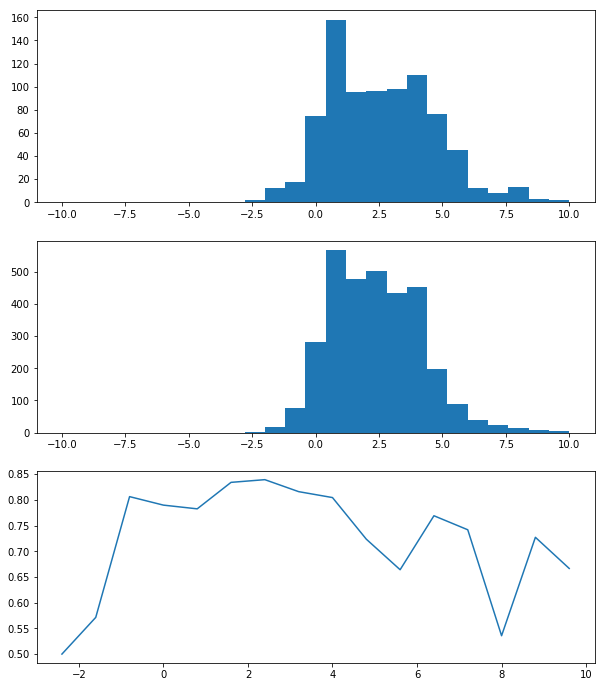

In [22]:
## Make histogram
#Let's visualize - is there a difference in how we predict when the true answer is 1 versus 0?
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 2 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'SP.URB.GROW'], bins=25, range=(-10,10))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'SP.URB.GROW'], bins=25, range=(-10,10))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))

In [23]:
X_train.columns

Index(['SP.POP.GROW', 'SP.URB.GROW'], dtype='object', name='indicator_code')

In [24]:
y_train.describe()

count     4038
unique       2
top          1
freq      3213
Name: growing_1_shrinking_0, dtype: int64